<font size="+3"><strong> Imbalanced Data</strong></font>

In this lesson, we're going to explore some of the features of the dataset, use visualizations to help us understand those features, and develop a model that solves the problem of imbalanced data by under- and over-sampling.

In [5]:
import gzip
import json
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

# Prepare Data

## Import

**Task 5.2.1:** Complete the `wrangle` function below using the code you developed in the last lesson. Then use it to import `poland-bankruptcy-data-2009.json.gz` into the DataFrame `df`.


In [6]:
def wrangle(filename):
    
    # Open compressed file, load into dictionary
    with gzip.open(filename,"r") as f:
        data = json.load(f)
    # Load dictionary into DataFrame, set index
    df=pd.DataFrame.from_dict(data["data"]).set_index("company_id")
    return df

In [7]:
df = wrangle("data/poland-bankruptcy-data-2009.json.gz")
print(df.shape)
df.head()

(9977, 65)


,Attr_1,Attr_2,Attr_3,Attr_4,Attr_5,Attr_6,Attr_7,Attr_8,Attr_9,Attr_10,...,Attr_56,Attr_57,Attr_58,Attr_59,Attr_60,Attr_61,Attr_62,Attr_63,Attr_64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
4,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False


## Explore

**Task 5.2.2:** Use the `info` method to explore `df`. What type of features does this dataset have? Which column is the target? Are there columns will missing values that we'll need to address?


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 1 to 10503
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Attr_1    9977 non-null   float64
 1   Attr_2    9977 non-null   float64
 2   Attr_3    9977 non-null   float64
 3   Attr_4    9959 non-null   float64
 4   Attr_5    9955 non-null   float64
 5   Attr_6    9977 non-null   float64
 6   Attr_7    9977 non-null   float64
 7   Attr_8    9963 non-null   float64
 8   Attr_9    9974 non-null   float64
 9   Attr_10   9977 non-null   float64
 10  Attr_11   9977 non-null   float64
 11  Attr_12   9959 non-null   float64
 12  Attr_13   9936 non-null   float64
 13  Attr_14   9977 non-null   float64
 14  Attr_15   9969 non-null   float64
 15  Attr_16   9963 non-null   float64
 16  Attr_17   9963 non-null   float64
 17  Attr_18   9977 non-null   float64
 18  Attr_19   9936 non-null   float64
 19  Attr_20   9936 non-null   float64
 20  Attr_21   9210 non-null   flo

**Task 5.2.3:** Create a bar chart of the value counts for the `"bankrupt"` column. You want to calculate the relative frequencies of the classes, not the raw count, so be sure to set the `normalize` argument to `True`.


<AxesSubplot:title={'center':'class balance'}, xlabel='bankrupt', ylabel='frequency'>

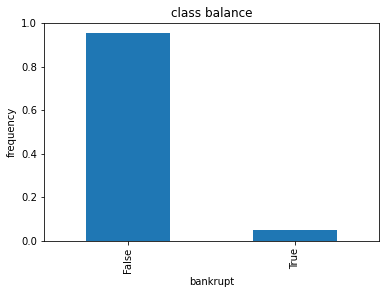

In [9]:
# Plot class balance
df["bankrupt"].value_counts(normalize=True).plot(
    kind ="bar",
    xlabel="bankrupt",
    ylabel="frequency",
    title="class balance"
)

In [10]:
df["bankrupt"].value_counts()

False    9509
True      468
Name: bankrupt, dtype: int64

**Task 5.2.4:** Use seaborn to create a boxplot that shows the distributions of the `"Attr_27"` column for both groups in the `"bankrupt"` column. Remember to label your axes. 


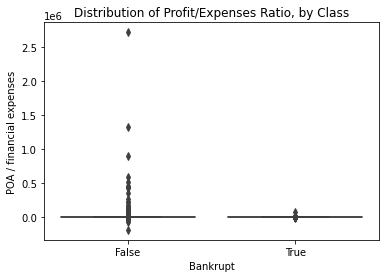

In [12]:
# Create boxplot
sns.boxplot(x="bankrupt",y="Attr_27",data=df)
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

Why does this look so funny? Remember that boxplots exist to help us see the quartiles in a dataset, and this one doesn't really do that. Let's check the distribution of `"Attr_27"`to see if we can figure out what's going on here.

**Task 5.2.5:** Use the `describe` method on the column for `"Attr_27"`. What can you tell about the distribution of the data based on the mean and median?

In [14]:
df["Attr_27"].describe().apply("{0:,.0f}".format)

count        9,300
mean         1,238
std         35,587
min       -190,130
25%              0
50%              1
75%              5
max      2,723,000
Name: Attr_27, dtype: object

**Task 5.2.6:** Create a histogram of `"Attr_27"`. Make sure to label x-axis `"POA / financial expenses"`, the y-axis `"Count"`, and use the title `"Distribution of Profit/Expenses Ratio"`.


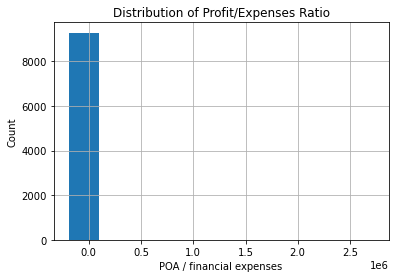

In [16]:
# Plot histogram of `feat_27`
df["Attr_27"].hist()
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

**Task 5.2.7:** Recreate the boxplot that you made above, this time only using the values for `"Attr_27"` that fall between the `0.1` and `0.9` quantiles for the column.


In [18]:
q1,q9=df["Attr_27"].quantile([.1,.9])
mask=df["Attr_27"].between(q1,q9)
mask.head()

company_id
1     True
2    False
3     True
4     True
5    False
Name: Attr_27, dtype: bool

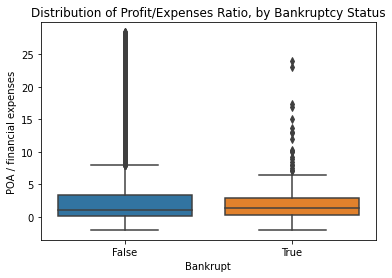

In [20]:
# Create clipped boxplot
q1,q9=df["Attr_27"].quantile([.1,.9])
mask=df["Attr_27"].between(q1,q9)
sns.boxplot(x="bankrupt",y="Attr_27",data=df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

**Task 5.2.9:** Plot a correlation heatmap of features in `df`. Since `"bankrupt"` will be your target, you don't need to include it in your heatmap.


<AxesSubplot:>

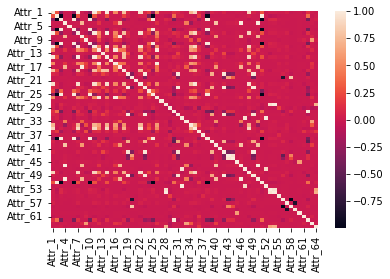

In [21]:
corr = df.drop(columns="bankrupt").corr()
sns.heatmap(corr)

## Split

**Task 5.2.10:** Create your feature matrix `X` and target vector `y`. Your target is `"bankrupt"`. 



In [22]:
target = "bankrupt"
X = df.drop(columns="bankrupt")
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (9977, 64)
y shape: (9977,)


**Task 5.2.11:** Divide your data (`X` and `y`) into training and test sets using a randomized train-test split. Your validation set should be 20% of your total data. And don't forget to set a `random_state` for reproducibility. 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2 , random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7981, 64)
y_train shape: (7981,)
X_test shape: (1996, 64)
y_test shape: (1996,)


## Resample

Now that we've split our data into training and validation sets, we can address the class imbalance we saw during our EDA. One strategy is to resample the training data. (This will be different than the resampling we did with time series data in Project 3.) There are many to do this, so let's start with under-sampling.

**Task 5.2.12:** Create a new feature matrix `X_train_under` and target vector `y_train_under` by performing random under-sampling on your training data.


### Under-sampling

When data is imbalanced in different classes, one way we can balance it is reducing the number of observations in the majority class. This is called **under-sampling**. We can under-sample by randomly deleting some observations in the majority class. The open source [imbalanced-learn](https://imbalanced-learn.org/stable/) (imported as `imblearn`) is an open-source library that works with `scikit-learn` and provides tools when dealing with imbalanced classes. Here's an example of randomly deleting observations from the majority class using Poland bankruptcy data from 2008.

In [24]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape)
X_train_under.head()

(768, 64)


,Attr_1,Attr_2,Attr_3,Attr_4,Attr_5,Attr_6,Attr_7,Attr_8,Attr_9,Attr_10,...,Attr_55,Attr_56,Attr_57,Attr_58,Attr_59,Attr_60,Attr_61,Attr_62,Attr_63,Attr_64
0,-2.105000,24.90500,-23.90500,0.040152,-414.460,-23.794000,-2.105000,-0.95985,19.15900,-23.90500,...,-599.57,-0.08762,0.088057,1.10870,0.000000,224.1300,21.1600,474.460,0.7693,NaN
1,-0.125320,0.72759,-0.19710,0.438560,-251.890,0.000000,-0.125320,0.37440,0.35832,0.27241,...,-6643.60,-0.35792,-0.460030,1.29650,0.065373,4.8657,4.7808,357.610,1.0207,0.42353
2,0.270080,0.28781,0.15668,4.017500,144.840,0.000000,0.270080,2.47450,1.29870,0.71219,...,1599.60,0.19840,0.379220,0.80213,0.330080,27.5600,19.7510,14.593,25.0110,1.64110
3,0.003423,0.66715,-0.13566,0.723900,-138.050,-0.083792,0.003423,0.49892,2.22990,0.33285,...,-476.30,0.66819,0.010282,0.33179,0.100290,16.3470,10.3790,80.427,4.5383,3.46090
4,0.024250,0.45688,0.54657,2.585400,42.257,0.000000,0.024250,1.18880,2.59090,0.54312,...,2437.70,0.36289,0.044648,0.63934,0.000000,8.1490,8.1579,48.570,7.5149,23.84400


In [25]:
y_train_under.value_counts()

False    384
True     384
Name: bankrupt, dtype: int64

In [26]:
y_train_under.shape

(768,)

**Task 5.2.13:** Create a new feature matrix `X_train_over` and target vector `y_train_over` by performing random over-sampling on your training data.


In [27]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(15194, 64)


,Attr_1,Attr_2,Attr_3,Attr_4,Attr_5,Attr_6,Attr_7,Attr_8,Attr_9,Attr_10,...,Attr_55,Attr_56,Attr_57,Attr_58,Attr_59,Attr_60,Attr_61,Attr_62,Attr_63,Attr_64
0,0.121230,0.84119,0.156800,1.18900,25.4150,0.00000,0.149930,0.18879,2.36040,0.15881,...,2519.90,0.062611,0.763360,0.93666,0.000000,NaN,2.4956,128.260,2.8458,171.6300
1,0.009168,1.23540,-0.659060,0.22347,-143.1000,-0.57453,0.009168,-0.19052,1.75080,-0.23536,...,-199.71,-0.007404,-0.038951,0.99507,-1.603800,95.4700,10.5420,176.940,2.0628,2.1605
2,0.041290,0.32144,0.115610,1.38590,-64.4780,0.23585,0.041290,2.10300,1.07380,0.67599,...,1851.80,0.068742,0.061081,0.93126,0.032312,4.0947,16.1260,122.120,2.9889,1.5312
3,0.078780,0.39680,0.013543,1.05890,5.6338,0.00000,0.078780,1.52020,0.87894,0.60320,...,105.45,0.111240,0.130600,0.91263,0.276570,4435.2000,4.0019,95.499,3.8220,1.1619
4,0.061946,0.44483,0.108770,1.39480,40.3740,0.00000,0.078467,1.24810,1.08370,0.55517,...,305.28,0.083842,0.111580,0.92843,0.305000,548.4500,3.1107,92.786,3.9338,1.7601


In [28]:
X_train_over.shape

(15194, 64)

In [29]:
y_train_over.shape

(15194,)

In [30]:
y_train_over.value_counts()

False    7597
True     7597
Name: bankrupt, dtype: int64

# Build Model

## Baseline

**Task 5.2.14:** Calculate the baseline accuracy score for your model.


In [32]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9519


Note here that, because our classes are imbalanced, the baseline accuracy is very high. We should keep this in mind because, even if our trained model gets a high validation accuracy score, that doesn't mean it's actually *good.* 

## Iterate

Now that we have a baseline, let's build a model to see if we can beat it.

**Task 5.2.15:** Create three identical models: `model_reg`, `model_under` and `model_over`. All of them should use a `SimpleImputer` followed by a `DecisionTreeClassifier`. Train `model_reg` using the unaltered training data. For `model_under`, use the undersampled data. For `model_over`, use the oversampled data.


In [34]:
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(SimpleImputer(strategy="median"),DecisionTreeClassifier(random_state=42))
model_reg.fit(X_train,y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(SimpleImputer(strategy="median"),DecisionTreeClassifier(random_state=42))
model_under.fit(X_train_under,y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(SimpleImputer(strategy="median"),DecisionTreeClassifier(random_state=42))
model_over.fit(X_train_over,y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

## Evaluate

**Task 5.2.16:** Calculate training and test accuracy for your three models. 


In [37]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train,y_train)
    acc_test = m.score(X_test,y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9374
Training Accuracy: 0.7336
Test Accuracy: 0.7119
Training Accuracy: 1.0
Test Accuracy: 0.9434


As we mentioned earlier, "good" accuracy scores don't tell us much about the model's performance when dealing with imbalanced data. So instead of looking at what the model got right or wrong, let's see how its predictions differ for the two classes in the dataset.

**Task 5.2.17:** Plot a confusion matrix that shows how your best model performs on your validation set. 


### Confusion Matrix

Accuracy score may not provide enough information to assess how a model is performing because it only gives us an overall score. Also, imbalanced data can lead to a high accuracy score even when a model isn't particularly useful. If we want to know what fraction of all positive predictions were correct and what fraction of positive observations did we identify, we can use a **confusion matrix**.

A confusion matrix is a table summarizing the performance of the model by enumerating true and false positives and the true and false negatives.

|                     | Positive Observation     | Negative Observation    |
|---------------------|:------------------------:|:-----------------------:|
| **Positive Prediction** |     True Positive (`TP`)   | False Positive (`FP`)     |
| **Negative Prediction** | False Negative (`FN`)      |     True Negative (`TN`)  |

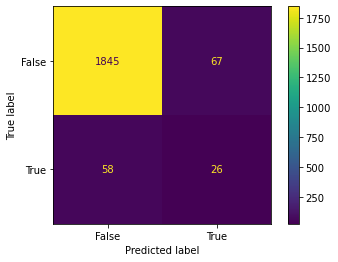

In [39]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_reg,X_test,y_test)

**Task 5.2.18:** Determine the depth of the decision tree in `model_over`.


In [40]:
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

36


# Communicate

**Task 5.2.19:** Create a horizontal bar chart with the 15 most important features for `model_over`. Be sure to label your x-axis `"Gini Importance"`.


In [44]:
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_
importances

array([0.00047473, 0.        , 0.00263194, 0.00915735, 0.0281968 ,
       0.01217747, 0.01561333, 0.00522965, 0.00873899, 0.00415118,
       0.00332105, 0.00937702, 0.01313767, 0.00262946, 0.02513812,
       0.00752933, 0.        , 0.        , 0.00742003, 0.00025501,
       0.0175045 , 0.01274592, 0.00274226, 0.02905968, 0.03220819,
       0.16076432, 0.12139919, 0.00233926, 0.01621715, 0.01493572,
       0.00310372, 0.00328712, 0.00481407, 0.08931015, 0.02290262,
       0.00094992, 0.00915906, 0.04075246, 0.00436359, 0.01380457,
       0.01024098, 0.00153499, 0.0056556 , 0.00444821, 0.00470713,
       0.01469244, 0.01330102, 0.00711756, 0.01094591, 0.00763145,
       0.00419617, 0.00231398, 0.00268265, 0.00286237, 0.00669973,
       0.01223722, 0.01140363, 0.06657545, 0.00724097, 0.00550112,
       0.0039141 , 0.        , 0.        , 0.03655471])

In [45]:
feat_imp = pd.Series(importances,index=X_train_over.columns).sort_values()
feat_imp

Attr_17    0.000000
Attr_2     0.000000
Attr_62    0.000000
Attr_63    0.000000
Attr_18    0.000000
             ...   
Attr_38    0.040752
Attr_58    0.066575
Attr_34    0.089310
Attr_27    0.121399
Attr_26    0.160764
Length: 64, dtype: float64

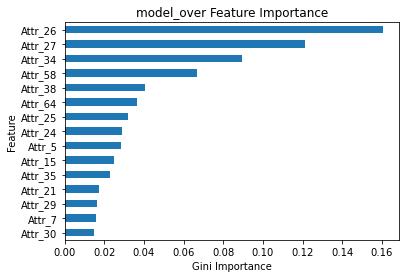

In [42]:
# Get importances
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances,index=X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

**Task 5.2.20:** Using a context manager, save your best-performing model to a a file named `"model-5-2.pkl"`.

In [46]:
# Save your model as `"model-5-2.pkl"`
with open("model-5-2.pkl","wb") as f :
    pickle.dump(model_over,f)

**Task 5.2.21:** Make sure you've saved your model correctly by loading `"model-5-2.pkl"` and assigning to the variable `loaded_model`. Once you're satisfied with the result

In [47]:
# Load `"model-5-2.pkl"`
with open("model-5-2.pkl","rb") as f :
    loaded_model = pickle.load(f)
print(loaded_model)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])
